
<!-- линейной регрессии она kaggle https://www.kaggle.com/code/dipankarroydipu/advertising-data-analysis-logistic-regression/notebook 
Взяла https://github.com/sajal2692/data-science-portfolio -->
# Логистическая регрессия 
Будем работать с набором данных по рекламе, показывающем, нажимал ли конкретный интернет-пользователь на рекламу. Построим модель, которая будет предсказывать, нажмёт ли пользователь на объявление на основе его/её характеристик. Необходимо бинарные классификация, используем логистическую регрессии.

#### Импортируем библиотеки, далее напишем функцию для визуализации.

In [1]:
from gitly.colab.plot import GitlyPlotter
import plotly.express as px

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

This script was made to run only on Google Colab notebooks, other environments was not tested completely
You are not in Colab envirement, make sure you already have Plotly > 4.9.0 and kaleido


In [2]:
def cf_matrix_plot(y_test, X_test):
    y_pred = logclf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['Истинно отрицательный', 'Ложно положительный', 'Ложно отрицательный', 'Истинно положительный']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')

    ax.set_title('Матрица путаницы\n\n');
    ax.set_xlabel('\nПредсказания')
    ax.set_ylabel('Фактические значения');
    ax.xaxis.set_ticklabels(['Ложь','Истина'])
    ax.yaxis.set_ticklabels(['Ложь','Истина'])
    plt.show()

## Импорт данных.  Имеются следующие столбцы:
'Время на сайте': время, проведенное потребителем на сайте в минутах.   
'Возраст': возраст покупателя.  
'Доход': сред. доход географического района потребителя.  
'Использование': среднее значение количество минут в день, которое потребитель находится в интернете.  
'Тема объявления': заголовок рекламного объявления.  
'Город': город потребителя.  
'Мужчина': был ли потребитель мужчиной.   
'Страна': Страна потребителя.  
'Время': время, когда потребитель нажал на рекламу или закрыл окно.  
'Клик': клик по объявлению.  

In [3]:
data = pd.read_csv('advertising.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

data.head(3)

,Время на сайте,Возраст,Доход,Использование,Тема объявления,Город,Мужчина,Страна,Время,Клик
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Время на сайте   1000 non-null   float64
 1   Возраст          1000 non-null   int64  
 2   Доход            1000 non-null   float64
 3   Использование    1000 non-null   float64
 4   Тема объявления  1000 non-null   object 
 5   Город            1000 non-null   object 
 6   Мужчина          1000 non-null   int64  
 7   Страна           1000 non-null   object 
 8   Время            1000 non-null   object 
 9   Клик             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
data.describe()

,Время на сайте,Возраст,Доход,Использование,Мужчина,Клик
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Анализ данных
  
  Ознакомимся с распределением пользователей по возрасту.

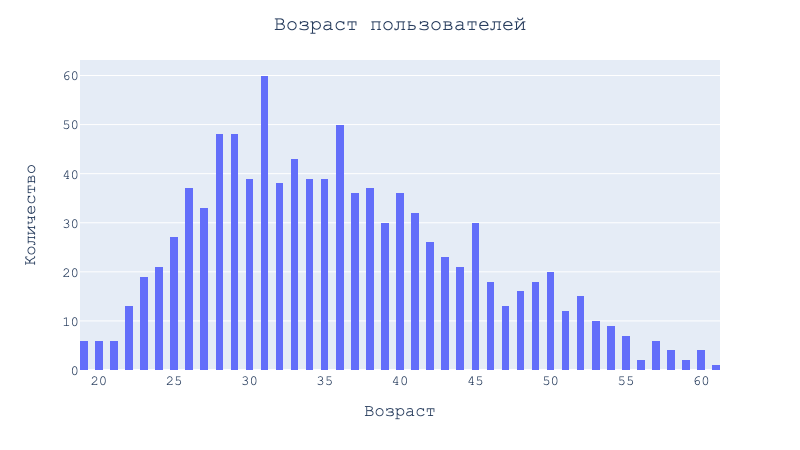

In [6]:
gitly = GitlyPlotter('github')
fig = px.histogram(data, x='Возраст', nbins=110)
fig.update_layout(barmode = 'overlay')
fig.update_layout(
    title='Возраст пользователей',
    xaxis_title="Возраст",
    yaxis_title="Количество",
    title_x=0.5,
    font=dict(
        family="Courier New, monospace",
        size=14
    )
)
gitly.show( fig )

Посмотрим на взаимосвязь возраста и ежедневное время, проведённое на сайте.

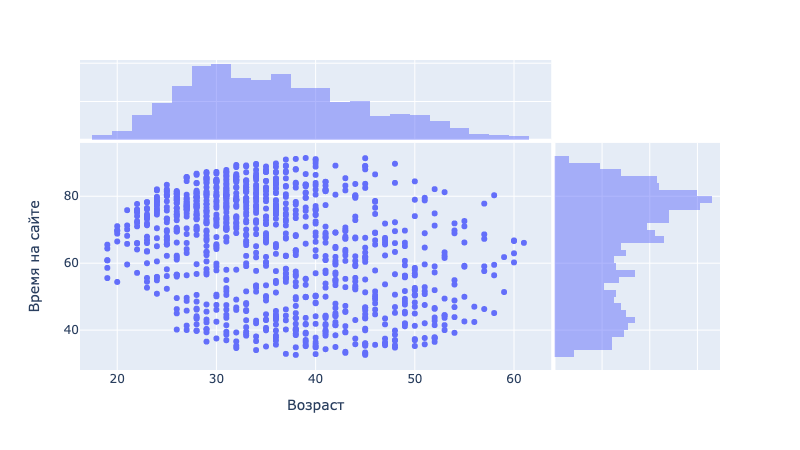

In [7]:
fig = px.scatter(data, x='Возраст',y='Время на сайте', marginal_x='histogram', marginal_y='histogram')
gitly.show( fig )

Также посмотрим на взаимосвязь между временем, проведенным в интернете и временем, проведенным на сайте.

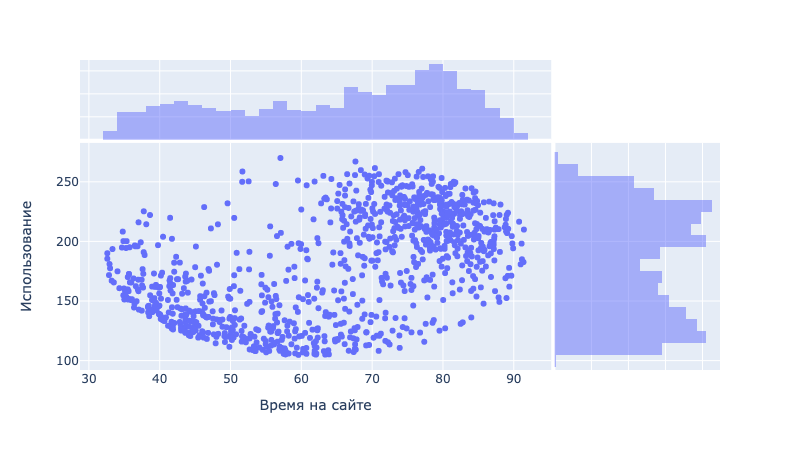

In [8]:
fig = px.scatter(data, y='Использование', x='Время на сайте', marginal_x='histogram', marginal_y='histogram')
gitly.show( fig )

Наконец, матрица точечных графиков, для визуализации всего остального. Окрашенна она в зависимости от того, нажал ли пользователь на рекламу, либо нет.

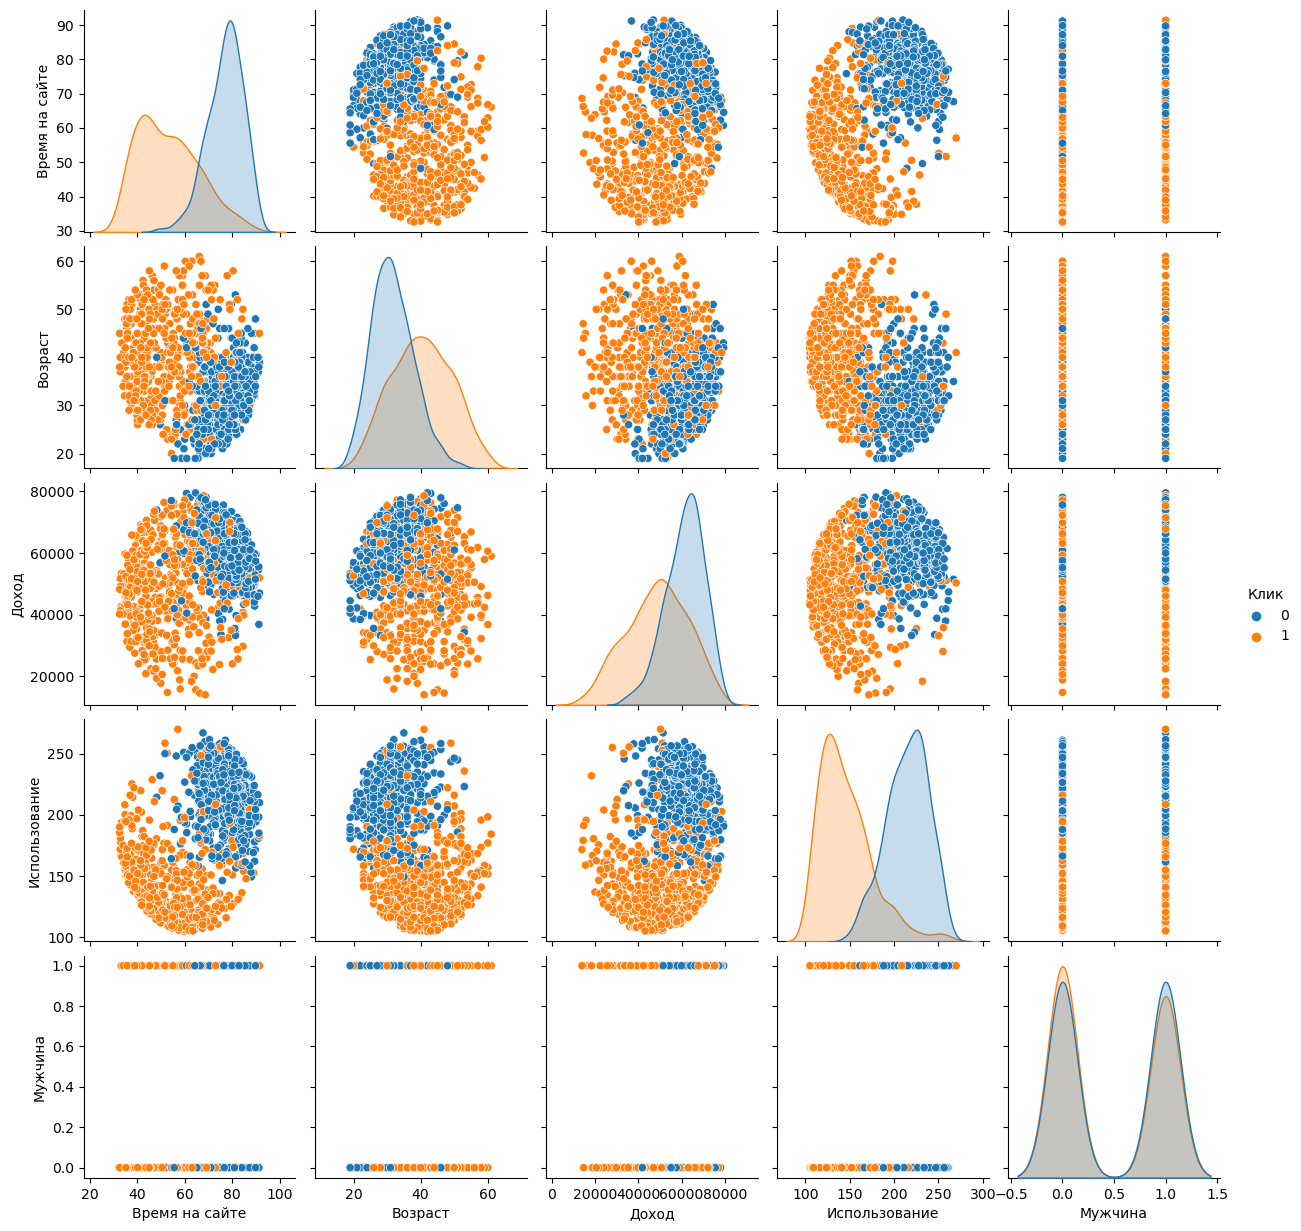

In [9]:
sns.pairplot(data,hue='Клик')

## Построим модель 
Разделим данные: на обучающую и тестовую выборки. 
> Для начало преобразуем столбец со страной в удобный формат для работы.
>> Преобразуем категорию в фиктивные переменные. Объединим их с исходным набором данных, удалим ненужные столбце. 

In [10]:
countries = pd.get_dummies(data['Страна'],drop_first=True)

data = pd.concat([data,countries],axis=1)

data.drop(['Страна','Тема объявления','Город','Время'], axis=1, inplace=True)

 Разделим данные

In [11]:
X = data.drop('Клик',axis=1)
y = data['Клик']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Обучим модель 

In [13]:
from sklearn.linear_model import LogisticRegression

logclf = LogisticRegression()

logclf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

## Прогнозы и оценки

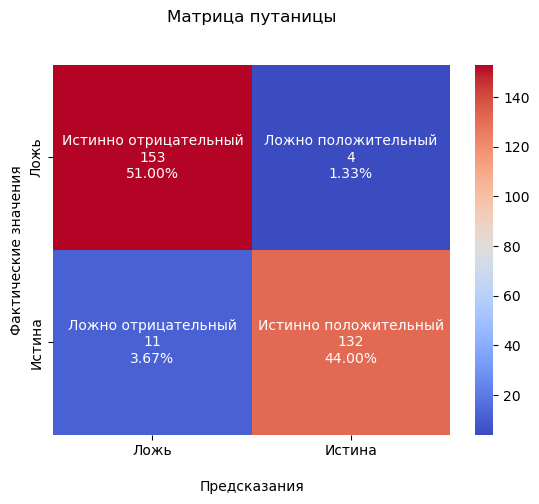

In [14]:
cf_matrix_plot(y_test, X_test)

In [15]:
# сбалансированный показатель точности
from sklearn.metrics import balanced_accuracy_score
y_pred = logclf.predict(X_test)
accuracy = balanced_accuracy_score(y_test, y_pred)
accuracy_percent = round(round(accuracy, 4) * 100, 1)

In [16]:
print(f'Оценка точности нашей модели логистической регрессии составляет  {accuracy_percent}')

Оценка точности нашей модели логистической регрессии составляет  94.9


### Следовательно, модель очень хорошо предсказывает, кликнет ли пользователь по объявлению. 